In [68]:
import os, itables, h3pandas, pygris, folium
import pandas as pd
import geopandas as gpd
import contextily as ctx
from matplotlib import pyplot as plt
itables.options.style = 'float:left;width:auto'

In [2]:
df = pd.read_parquet(os.path.join('data', 'parsedData.parquet')).reset_index(drop=True)

In [3]:
itables.show(df)

In [4]:
kittitasDf = df[df.county_geoid == '53037'].reset_index(drop=True)

In [5]:
kittitasDf['bead'] = (kittitasDf['cableServed'].astype('str') 
+ ',' + kittitasDf['copperServed'].astype('str')
+ ',' + kittitasDf['fiberServed'].astype('str')
+ ',' + kittitasDf['lfwServed'].astype('str'))

In [6]:
kittitasDf['beadLbr'] = (kittitasDf['cableServed'].astype('str') 
+ ',' + kittitasDf['copperServed'].astype('str')
+ ',' + kittitasDf['fiberServed'].astype('str')
+ ',' + kittitasDf['lfwServed'].astype('str')
+ ',' + kittitasDf['lbrwServed'].astype('str'))

In [7]:
kittitasDf

,location_id,block_geoid,h3_res8_id,county_geoid,wsbo,cableServed,copperServed,fiberServed,gsoServed,lbrwServed,lfwServed,ngsoServed,ufwServed,bead,beadLbr
0,1296304928,530379751011156,8828d4770dfffff,53037,Underserved,Underserved,Unserved,Unserved,Underserved,Unserved,Underserved,Underserved,Unserved,"Underserved,Unserved,Unserved,Underserved","Underserved,Unserved,Unserved,Underserved,Unse..."
1,1296296608,530379754042008,88288922a1fffff,53037,Served,Served,Unserved,Unserved,Underserved,Unserved,Underserved,Underserved,Served,"Served,Unserved,Unserved,Underserved","Served,Unserved,Unserved,Underserved,Unserved"
2,1296297270,530379754043001,882889201bfffff,53037,Served,Served,Unserved,Unserved,Underserved,Unserved,Underserved,Underserved,Served,"Served,Unserved,Unserved,Underserved","Served,Unserved,Unserved,Underserved,Unserved"
3,1296310229,530379756002052,88288922ebfffff,53037,Served,Served,Unserved,Unserved,Underserved,Unserved,Served,Underserved,Served,"Served,Unserved,Unserved,Served","Served,Unserved,Unserved,Served,Unserved"
4,1296299467,530379751031060,8828d450b7fffff,53037,Underserved,Underserved,Underserved,Unserved,Underserved,Unserved,Underserved,Underserved,Served,"Underserved,Underserved,Unserved,Underserved","Underserved,Underserved,Unserved,Underserved,U..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22925,1296294544,530379752011097,8828892493fffff,53037,Unserved,Unserved,Unserved,Unserved,Underserved,Unserved,Unserved,Underserved,Served,"Unserved,Unserved,Unserved,Unserved","Unserved,Unserved,Unserved,Unserved,Unserved"
22926,1296307737,530379753002012,8828892569fffff,53037,Underserved,Unserved,Unserved,Unserved,Underserved,Unserved,Underserved,Underserved,Served,"Unserved,Unserved,Unserved,Underserved","Unserved,Unserved,Unserved,Underserved,Unserved"
22927,1296307999,530379751011355,8828d451e3fffff,53037,Unserved,Unserved,Unserved,Unserved,Underserved,Unserved,Unserved,Underserved,Served,"Unserved,Unserved,Unserved,Unserved","Unserved,Unserved,Unserved,Unserved,Unserved"
22928,1296295966,530379751041084,8828d45515fffff,53037,Unserved,Unserved,Unserved,Unserved,Underserved,Unserved,Unserved,Underserved,Served,"Unserved,Unserved,Unserved,Unserved","Unserved,Unserved,Unserved,Unserved,Unserved"


In [8]:
(kittitasDf.bead == 'Unserved,Unserved,Unserved,Underserved').value_counts()

bead
False    21071
True      1859
Name: count, dtype: int64

In [9]:
(kittitasDf.bead == 'Unserved,Unserved,Unserved,Served').value_counts()

bead
False    22723
True       207
Name: count, dtype: int64

In [12]:
(kittitasDf.beadLbr == 'Unserved,Unserved,Unserved,Served').value_counts()

beadLbr
False    22930
Name: count, dtype: int64

In [36]:
lfwServedKittitas = kittitasDf[kittitasDf.bead == 'Unserved,Unserved,Unserved,Served'].h3_res8_id.value_counts().reset_index().rename(columns={'count': 'bsls'})
lfwServedKittitas = lfwServedKittitas.set_index('h3_res8_id')
lfwServedKittitas = lfwServedKittitas.h3.h3_to_geo_boundary()
lfwServedKittitas = lfwServedKittitas.reset_index()
lfwServedKittitas = gpd.GeoDataFrame(lfwServedKittitas)
lfwServedKittitas = lfwServedKittitas.to_crs(epsg=3857)

<Axes: >

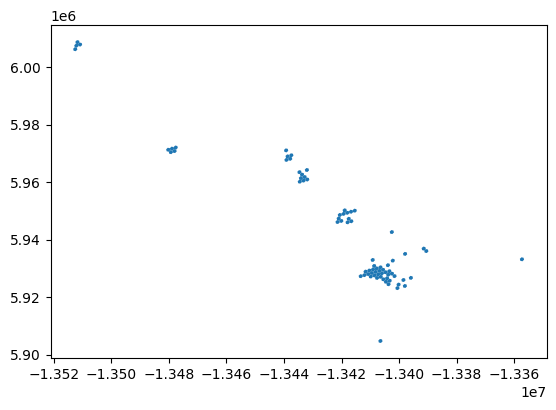

In [37]:
lfwServedKittitas.plot()

In [54]:
waCounties = pygris.counties(state='WA', cache=True)


Using the default year of 2021
Using FIPS code '53' for input 'WA'


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1201,53,037,01531926,53037,Kittitas,Kittitas County,06,H1,G4020,None,21260,None,A,5949926850,92486168,+47.1244411,-120.6767092,"POLYGON ((-120.00214 46.99732, -120.00193 46.9..."


(-13530104.613452021,
 -13341483.599209702,
 5892057.441935481,
 6047280.564818999)

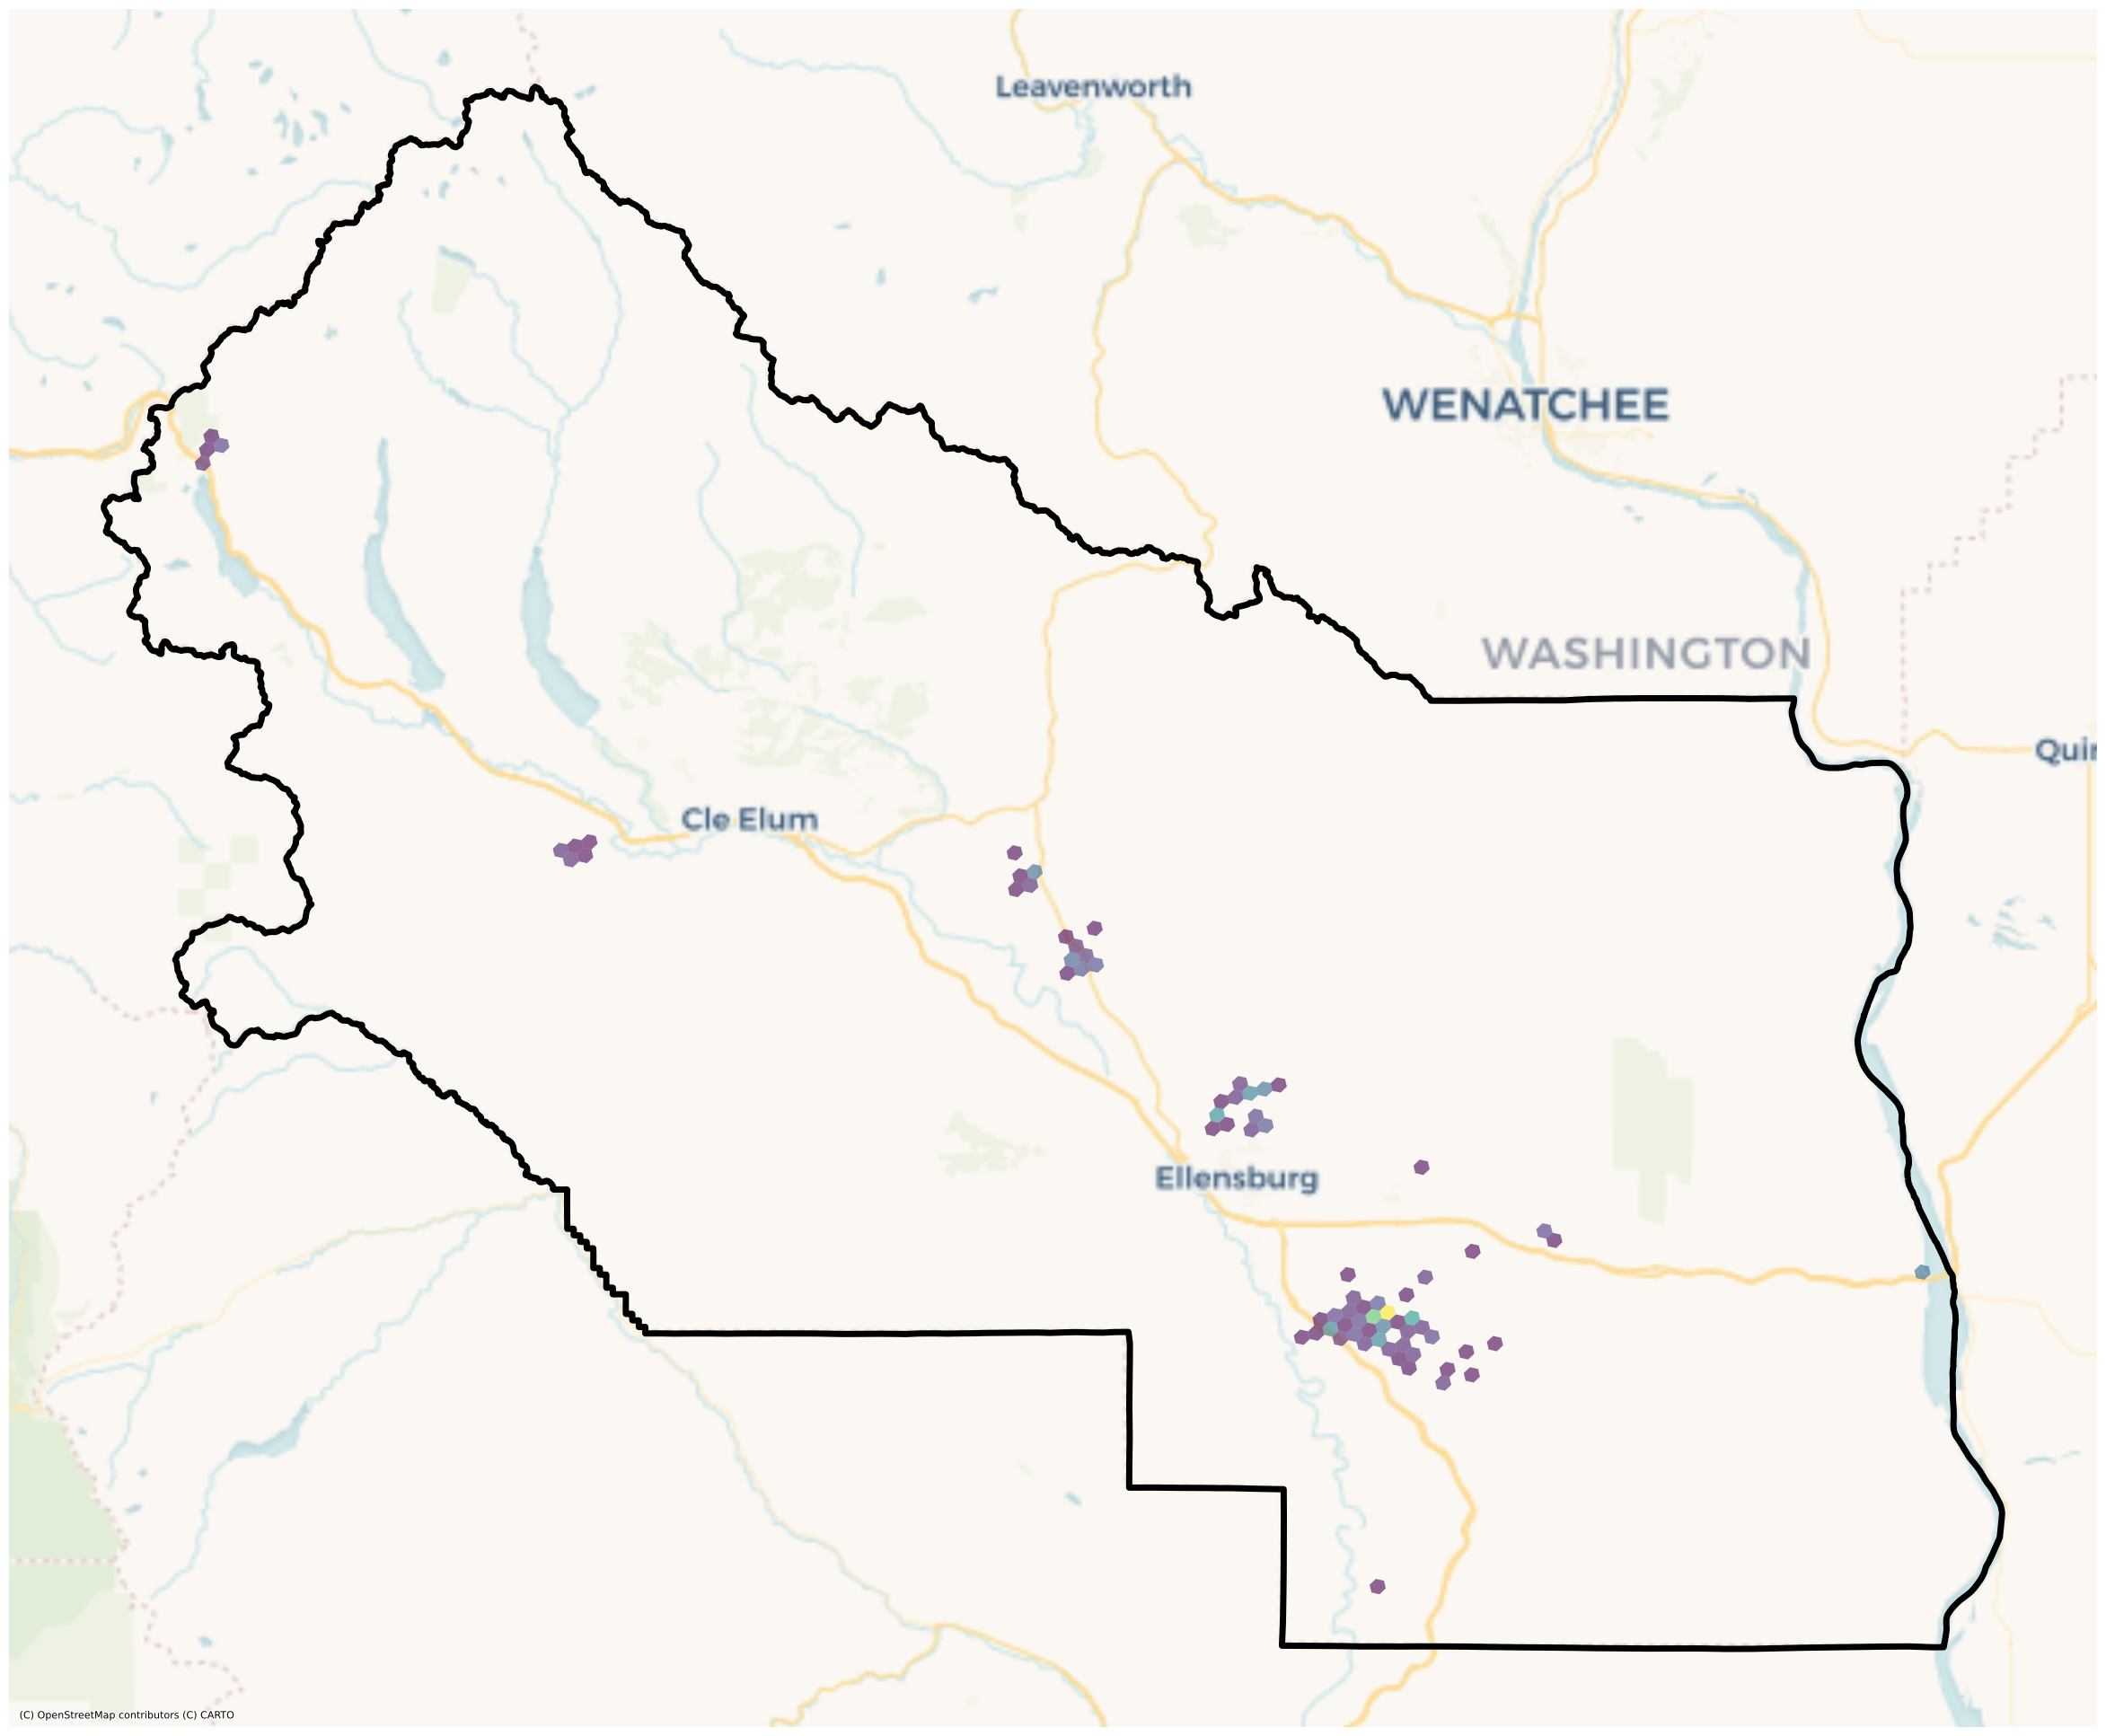

In [63]:
fig, ax2 = plt.subplots(figsize=(30,25))
kittitasBorder = waCounties[waCounties.NAME == 'Kittitas'].to_crs(epsg=3857)
kittitasBorder.plot(ax=ax2, facecolor='none', edgecolor='black', lw=5)
lfwServedKittitas.plot(ax=ax2, column='bsls', alpha=.6)
ctx.add_basemap(ax=ax2, crs='epsg:3857', source=ctx.providers.CartoDB.Voyager)
ax2.axis('off')


In [77]:
m = folium.Map(tiles='CartoDB Positron')
lfwServedKittitas.explore(m = m, column='bsls')
kittitasBorder.explore(m = m, style_kwds={'fill': False, 'color': 'black'})
m.fit_bounds(m.get_bounds())
m

In [11]:
itables.show(kittitasDf)